In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
from os import listdir,mkdir
from os.path import isfile, join,exists
import json

In [2]:
final_folders2=['armraise','bicyclecrunch','birddog','curl','fly','legraise','overheadpress','pushup','squat','superman']
labels=['armraise','bicyclecrunch','birddog','curl','fly','legrais','overheadpress','pushup','squat','superman']
angle_finalPath='/home/asuran/Downloads/prcv_prj/data/train/angle'
positions_finalPath='/home/asuran/Downloads/prcv_prj/data/train/positions'
output_array_intialization=[0,0,0,0,0,0,0,0,0,0]
frame_size=1
drive_path='/home/asuran/Downloads/prcv_prj/data'
# local_path='/Users/vikashmediboina/Documents/Exersises'
postion_rep_wise_data_path='postion_rep_wise_data_10_vedioes_each_exersise.xlsx'
angle_rep_wise_data_path='angle_rep_wise_data_10_vedioes_each_exersise.xlsx'
postion_data_path='postion_data_frame_size_100.xlsx'
angle_data_path='postion_data_frame_size_100.xlsx'
test_postion_rep_wise_data_path='test_postion_rep_wise_data.xlsx'
test_angle_rep_wise_data_path='test_angle_rep_wise_data.xlsx'
test_postion_data_path='test_postion_data_all.xlsx'
test_angle_data_path='test_angle_data_path.xlsx'

In [3]:
def fetch_data_rep_wise(finalPath,folders,data_type):
        pd_all_data=pd.DataFrame()
        all_files={}
        files_array=np.empty(shape=[0,28])
        id_count=0
        label_array=np.array([])
        id_dict={}
        key_word_extract='pixels'
        angle_key_word_extract='angles'
        pixel_key_word_extract='pixels'
        feauters=0
        video_length=0
        rep_length=0
        if(data_type=='angles'):
              key_word_extract=angle_key_word_extract
        else:
          key_word_extract=pixel_key_word_extract
        for path_index in range(0,len(folders)):
    #     path_index=0
          path=join(finalPath,folders[path_index])
          print("path index: ",path_index)
          print(path)
          onlyfiles = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith('.json')]
          for file_index in range(0,30):
                      f = open(join(path,onlyfiles[file_index]))
                      data = json.load(f)
                      for i in range(0,len(data['reps'])):
      #                     print(data['reps'][i]['pixels'].keys())
                          for key in data['reps'][i][key_word_extract]:
                                  feauters+=1
      #                             print(key)
                                  if(not(key in all_files)):
                                      all_files[key]=[]
                                  all_files[key].append(data['reps'][i][key_word_extract][key])
                          label_array=np.append(label_array,data['reps'][i]['label'])
                          if(not('label' in all_files)):
                                all_files['rep_id']=np.array([])
                                all_files['label']=np.array([])
                                all_files['vedio_id']=np.array([])
                          all_files["label"]=np.append(all_files["label"],[data['reps'][i]['label']])
                          all_files["rep_id"]=np.append(all_files["rep_id"],[rep_length])
                          all_files["vedio_id"]=np.append(all_files["vedio_id"],[video_length])


        pd_all_data = pd.DataFrame.from_dict(all_files)

        return pd_all_data,feauters
pd_rep_all_data,feauters=fetch_data_rep_wise(angle_finalPath,final_folders2,'angles')
pd_rep_all_data

path index:  0
/home/asuran/Downloads/prcv_prj/data/train/angle/armraise
path index:  1
/home/asuran/Downloads/prcv_prj/data/train/angle/bicyclecrunch
path index:  2
/home/asuran/Downloads/prcv_prj/data/train/angle/birddog
path index:  3
/home/asuran/Downloads/prcv_prj/data/train/angle/curl
path index:  4
/home/asuran/Downloads/prcv_prj/data/train/angle/fly
path index:  5
/home/asuran/Downloads/prcv_prj/data/train/angle/legraise
path index:  6
/home/asuran/Downloads/prcv_prj/data/train/angle/overheadpress
path index:  7
/home/asuran/Downloads/prcv_prj/data/train/angle/pushup
path index:  8
/home/asuran/Downloads/prcv_prj/data/train/angle/squat
path index:  9
/home/asuran/Downloads/prcv_prj/data/train/angle/superman


,angle_right_hand_elbow,angle_left_hand_elbow,angle_right_hand_shoulder,angle_left_hand_shoulder,angle_right_hip,angle_left_hip,angle_right_knee,angle_left_knee,rep_id,label,vedio_id
0,"[197.42225010950852, 197.42225010950852, 194.2...","[179.99999999999997, 179.99999999999997, 179.9...","[37.54570118725155, 37.54570118725155, 36.3358...","[316.930587441167, 316.930587441167, 316.93058...","[159.70602627242312, 159.70602627242312, 157.7...","[206.80920785052098, 206.80920785052098, 206.8...","[190.1511100488142, 190.1511100488142, 190.151...","[161.92998751280862, 161.92998751280862, 161.9...",0.0,armraise,0.0
1,"[209.74488129694225, 206.56505117707798, 203.1...","[172.77568430595468, 172.77568430595468, 169.4...","[42.27368900609372, 41.09950625761809, 37.7330...","[332.18570614422475, 332.18570614422475, 328.5...","[159.70602627242312, 157.70037890103453, 157.7...","[206.80920785052098, 206.80920785052098, 206.8...","[190.1511100488142, 190.1511100488142, 190.151...","[161.92998751280862, 161.92998751280862, 161.9...",0.0,armraise,0.0
2,"[201.4252937980874, 191.6336339989404, 191.633...","[180.00000000000003, 172.73675525941542, 174.9...","[45.264033981259104, 41.09950625761809, 41.099...","[318.72049804941304, 315.1948828522386, 311.88...","[159.70602627242312, 157.70037890103453, 157.7...","[206.80920785052098, 206.80920785052098, 206.8...","[190.1511100488142, 190.1511100488142, 190.151...","[161.92998751280862, 161.92998751280862, 161.9...",0.0,armraise,0.0
3,"[208.9211514378173, 205.9308064626519, 205.659...","[182.55109508900094, 182.55109508900094, 178.6...","[45.264033981259104, 44.27933637748231, 44.279...","[326.39290964919263, 326.39290964919263, 322.4...","[159.70602627242312, 157.70037890103453, 157.7...","[206.80920785052098, 206.80920785052098, 206.8...","[190.1511100488142, 190.1511100488142, 190.151...","[161.92998751280862, 161.92998751280862, 161.9...",0.0,armraise,0.0
4,"[197.42225010950852, 190.49147701233153, 194.2...","[187.26324474058455, 187.26324474058455, 183.5...","[37.54570118725155, 36.33586456689193, 36.3358...","[322.4581275928232, 322.4581275928232, 318.720...","[159.70602627242312, 157.70037890103453, 157.7...","[206.80920785052098, 206.80920785052098, 206.8...","[190.1511100488142, 190.1511100488142, 190.151...","[161.92998751280862, 161.92998751280862, 161.9...",0.0,armraise,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1886,"[282.9946167919165, 282.9946167919165, 282.994...","[182.4195092166563, 182.4195092166563, 183.551...","[303.5506620115, 303.5506620115, 303.550662011...","[174.88958243896877, 174.88958243896877, 175.5...","[190.40771131249008, 189.18883607735876, 189.1...","[125.041929401539, 125.041929401539, 125.04192...","[140.90614111377047, 150.25511870305775, 150.2...","[195.0684881594922, 195.0684881594922, 195.068...",0.0,superman,0.0
1887,"[262.05652818940956, 262.05652818940956, 249.7...","[107.65012421993015, 107.65012421993015, 107.6...","[183.94518622903757, 183.94518622903757, 182.0...","[168.11134196037204, 168.11134196037204, 168.1...","[262.8749836510982, 262.8749836510982, 262.874...","[106.07357416474639, 106.07357416474639, 106.0...","[128.99099404250546, 128.99099404250546, 128.9...","[221.82016988013572, 221.82016988013572, 216.8...",0.0,superman,0.0
1888,"[253.00917670801385, 253.00917670801385, 249.7...","[107.65012421993015, 107.65012421993015, 107.6...","[185.3893117599734, 185.3893117599734, 179.356...","[166.2930389959202, 166.2930389959202, 166.293...","[254.74488129694222, 254.74488129694222, 257.4...","[102.48808576894851, 100.27333064162929, 100.2...","[135.0, 135.0, 135.0, 135.0, 131.3086140135486...","[196.92751306414704, 204.20588504449637, 204.2...",0.0,superman,0.0
1889,"[253.00917670801385, 253.00917670801385, 253.0...","[107.65012421993015, 107.65012421993015, 107.6...","[185.3893117599734, 185.3893117599734, 185.389...","[166.2930389959202, 166.2930389959202, 166.293...","[270.0, 270.0, 270.0, 272.7263109939063, 265.6...","[107.891877129

In [4]:
pd_rep_all_data.to_excel(join(drive_path,angle_rep_wise_data_path))
pd_rep_all_data=pd.read_excel(join(drive_path,angle_rep_wise_data_path))
pd_rep_all_data=pd_rep_all_data.drop(['Unnamed: 0'],axis=1)

ModuleNotFoundError: No module named 'openpyxl'

In [5]:
for key in pd_rep_all_data:
    pd_rep_all_data[key]=pd_rep_all_data[key].astype(object)

In [6]:
y=pd_rep_all_data['label']
x=pd_rep_all_data.drop(labels=['label','rep_id','vedio_id'],axis=1)

In [7]:
%pip install dtaidistance
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn


from dtaidistance.dtw_visualisation import plot_warp,plot_warpingpaths
from dtaidistance import dtw

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.metrics import balanced_accuracy_score

  Using cached dtaidistance-2.3.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached dtaidistance-2.3.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.9 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.4.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
Using cached joblib-1.4.0-py3-none-any.whl (301 kB)
Using cached scipy-1.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached threadpoolctl-3.4.0-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.
Note

In [8]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.04, random_state=22)


In [9]:
def dtw_distance(s1,s2):
    # print(s1[1:-1].split(', '))
    d2, paths =dtw.warping_paths(s1, s2, window=2)
    # d2, paths = dtw.warping_paths(np.asarray(s1[1:-1].split(', ')).astype(float), np.asarray(s2[1:-1].split(', ')).astype(float), window=2)
#     best_path = dtw.best_path(paths)
    return d2

In [10]:
def distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += dtw_distance(row1[i], row2[i])
    return (distance)

In [11]:
pd_rep_all_data

,angle_right_hand_elbow,angle_left_hand_elbow,angle_right_hand_shoulder,angle_left_hand_shoulder,angle_right_hip,angle_left_hip,angle_right_knee,angle_left_knee,rep_id,label,vedio_id
0,"[197.42225010950852, 197.42225010950852, 194.2...","[179.99999999999997, 179.99999999999997, 179.9...","[37.54570118725155, 37.54570118725155, 36.3358...","[316.930587441167, 316.930587441167, 316.93058...","[159.70602627242312, 159.70602627242312, 157.7...","[206.80920785052098, 206.80920785052098, 206.8...","[190.1511100488142, 190.1511100488142, 190.151...","[161.92998751280862, 161.92998751280862, 161.9...",0.0,armraise,0.0
1,"[209.74488129694225, 206.56505117707798, 203.1...","[172.77568430595468, 172.77568430595468, 169.4...","[42.27368900609372, 41.09950625761809, 37.7330...","[332.18570614422475, 332.18570614422475, 328.5...","[159.70602627242312, 157.70037890103453, 157.7...","[206.80920785052098, 206.80920785052098, 206.8...","[190.1511100488142, 190.1511100488142, 190.151...","[161.92998751280862, 161.92998751280862, 161.9...",0.0,armraise,0.0
2,"[201.4252937980874, 191.6336339989404, 191.633...","[180.00000000000003, 172.73675525941542, 174.9...","[45.264033981259104, 41.09950625761809, 41.099...","[318.72049804941304, 315.1948828522386, 311.88...","[159.70602627242312, 157.70037890103453, 157.7...","[206.80920785052098, 206.80920785052098, 206.8...","[190.1511100488142, 190.1511100488142, 190.151...","[161.92998751280862, 161.92998751280862, 161.9...",0.0,armraise,0.0
3,"[208.9211514378173, 205.9308064626519, 205.659...","[182.55109508900094, 182.55109508900094, 178.6...","[45.264033981259104, 44.27933637748231, 44.279...","[326.39290964919263, 326.39290964919263, 322.4...","[159.70602627242312, 157.70037890103453, 157.7...","[206.80920785052098, 206.80920785052098, 206.8...","[190.1511100488142, 190.1511100488142, 190.151...","[161.92998751280862, 161.92998751280862, 161.9...",0.0,armraise,0.0
4,"[197.42225010950852, 190.49147701233153, 194.2...","[187.26324474058455, 187.26324474058455, 183.5...","[37.54570118725155, 36.33586456689193, 36.3358...","[322.4581275928232, 322.4581275928232, 318.720...","[159.70602627242312, 157.70037890103453, 157.7...","[206.80920785052098, 206.80920785052098, 206.8...","[190.1511100488142, 190.1511100488142, 190.151...","[161.92998751280862, 161.92998751280862, 161.9...",0.0,armraise,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1886,"[282.9946167919165, 282.9946167919165, 282.994...","[182.4195092166563, 182.4195092166563, 183.551...","[303.5506620115, 303.5506620115, 303.550662011...","[174.88958243896877, 174.88958243896877, 175.5...","[190.40771131249008, 189.18883607735876, 189.1...","[125.041929401539, 125.041929401539, 125.04192...","[140.90614111377047, 150.25511870305775, 150.2...","[195.0684881594922, 195.0684881594922, 195.068...",0.0,superman,0.0
1887,"[262.05652818940956, 262.05652818940956, 249.7...","[107.65012421993015, 107.65012421993015, 107.6...","[183.94518622903757, 183.94518622903757, 182.0...","[168.11134196037204, 168.11134196037204, 168.1...","[262.8749836510982, 262.8749836510982, 262.874...","[106.07357416474639, 106.07357416474639, 106.0...","[128.99099404250546, 128.99099404250546, 128.9...","[221.82016988013572, 221.82016988013572, 216.8...",0.0,superman,0.0
1888,"[253.00917670801385, 253.00917670801385, 249.7...","[107.65012421993015, 107.65012421993015, 107.6...","[185.3893117599734, 185.3893117599734, 179.356...","[166.2930389959202, 166.2930389959202, 166.293...","[254.74488129694222, 254.74488129694222, 257.4...","[102.48808576894851, 100.27333064162929, 100.2...","[135.0, 135.0, 135.0, 135.0, 131.3086140135486...","[196.92751306414704, 204.20588504449637, 204.2...",0.0,superman,0.0
1889,"[253.00917670801385, 253.00917670801385, 253.0...","[107.65012421993015, 107.65012421993015, 107.6...","[185.3893117599734, 185.3893117599734, 185.389...","[166.2930389959202, 166.2930389959202, 166.293...","[270.0, 270.0, 270.0, 272.7263109939063, 265.6...","[107.891877129

In [12]:
def predict_knn(X_train,y_train, X,n_neighbors):

        # initialize prediction_knn as empty list
        prediction_knn = []

        # # initialize euclidian_distances as empty list
        # euclidian_distances = []

        for test_row_index,test in X.iterrows():  # Main loop iterating through len(X)
            print(test_row_index)
            # initialize euclidian_distances as empty list
            distances = []
            train_row_indexs=[]
            for train_row_index,train in X_train.iterrows():
#                 print(test,row)
                # for every row in X_train, find eucl_distance to X using
                # euclidean_distance() and append to euclidian_distances list
                dist = distance(train,test)
                distances.append(dist)
                train_row_indexs.append(train_row_index)
            # sort euclidian_distances in ascending order, and retain only k
            # neighbors as specified in n_neighbors (n_neighbors = k)
            neighbors = np.array(distances).argsort()[: n_neighbors]
#             print(neighbors,distances)
            # initialize dict to count class occurrences in y_train
            count_neighbors = {}

            for val in neighbors:
#                 print(val)
                if y_train[train_row_indexs[val]] in count_neighbors:
                    count_neighbors[y_train[train_row_indexs[val]]] += 1
                else:
                    count_neighbors[y_train[train_row_indexs[val]]] = 1

            # max count labels to prediction_knn
            prediction_knn.append(max(count_neighbors, key=count_neighbors.get))

        return prediction_knn

In [13]:
prediction = predict_knn(X_train,y_train, X_test, 3)
print(balanced_accuracy_score(y_test, prediction))
cf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(15,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

      ## Display the visualization of the Confusion Matrix.
plt.show()
print(prediction)

1199


/tmp/ipykernel_13684/1463584880.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  distance += dtw_distance(row1[i], row2[i])


1207
1039
76
1775
931
1624
1242
1618
774
117
308
763
113
441
314
221
1298
1575
57
903
1182
475
426
1126
1543
1726
169
203
797
425
254
229
243
1645
95
920
570
1075
1350
711
910
286
913
461
0
1613
341
110
1651
1338
1621
1013
392
1406
207
199
567
809
887
432
309
1445
666
415


KeyboardInterrupt: 

In [ ]:
# ['overheadpress', 'overheadpress', 'pushup', 'curl', 'pushup', 'birddog', 'squat', 'squat', 'pushup', 'superman', 'superman', 'bicyclecrunch', 'fly', 'birddog', 'birddog', 'armraise', 'fly', 'curl', 'overheadpress', 'birddog', 'legraise', 'squat', 'armraise', 'pushup', 'squat', 'squat', 'curl', 'birddog', 'superman', 'armraise', 'squat', 'overheadpress', 'curl', 'armraise', 'superman', 'pushup', 'armraise', 'bicyclecrunch', 'overheadpress', 'curl', 'curl', 'overheadpress', 'legraise', 'curl', 'overheadpress', 'pushup', 'armraise', 'overheadpress', 'armraise', 'squat', 'legraise', 'overheadpress', 'armraise', 'bicyclecrunch', 'pushup', 'pushup', 'armraise', 'bicyclecrunch', 'superman', 'overheadpress', 'armraise', 'legraise', 'pushup', 'armraise', 'pushup', 'squat', 'squat', 'squat', 'pushup', 'squat', 'legraise', 'bicyclecrunch', 'superman', 'armraise', 'legraise', 'curl', 'overheadpress', 'pushup', 'overheadpress', 'bicyclecrunch', 'fly', 'birddog', 'overheadpress', 'squat', 'legraise', 'curl', 'pushup', 'armraise', 'superman', 'legraise', 'superman', 'fly', 'pushup', 'squat', 'fly', 'superman', 'squat', 'curl', 'birddog', 'bicyclecrunch', 'fly', 'superman', 'overheadpress', 'pushup', 'overheadpress', 'birddog', 'birddog', 'overheadpress', 'fly', 'overheadpress', 'armraise', 'fly', 'pushup', 'superman', 'armraise', 'bicyclecrunch', 'armraise', 'pushup', 'superman', 'armraise', 'curl', 'legraise', 'birddog', 'fly', 'pushup', 'squat', 'curl', 'superman', 'curl', 'bicyclecrunch', 'bicyclecrunch', 'superman', 'pushup', 'overheadpress', 'superman', 'overheadpress', 'superman', 'armraise', 'overheadpress', 'squat', 'superman', 'pushup', 'squat', 'legraise', 'bicyclecrunch', 'superman', 'fly', 'pushup', 'overheadpress', 'superman', 'fly', 'legraise', 'curl', 'armraise', 'superman', 'superman', 'bicyclecrunch', 'curl', 'bicyclecrunch', 'overheadpress', 'pushup', 'legraise', 'legraise', 'overheadpress', 'armraise', 'birddog', 'birddog', 'pushup', 'bicyclecrunch', 'armraise', 'bicyclecrunch', 'birddog', 'bicyclecrunch', 'squat', 'squat', 'armraise', 'superman', 'superman', 'pushup', 'superman', 'squat', 'birddog', 'pushup', 'curl', 'birddog', 'bicyclecrunch', 'fly', 'bicyclecrunch', 'bicyclecrunch', 'pushup', 'pushup', 'legraise', 'birddog', 'fly', 'superman', 'superman', 'curl', 'overheadpress', 'overheadpress', 'curl', 'armraise', 'squat', 'bicyclecrunch', 'curl', 'birddog', 'birddog', 'armraise', 'overheadpress', 'bicyclecrunch', 'bicyclecrunch', 'overheadpress', 'pushup', 'overheadpress', 'fly', 'pushup', 'curl', 'overheadpress', 'birddog', 'armraise', 'fly', 'fly', 'armraise', 'squat', 'curl', 'pushup', 'bicyclecrunch', 'bicyclecrunch', 'armraise', 'fly', 'curl', 'superman', 'legraise', 'curl', 'bicyclecrunch', 'armraise', 'legraise', 'bicyclecrunch', 'armraise', 'armraise', 'fly', 'overheadpress', 'bicyclecrunch', 'pushup', 'overheadpress', 'armraise', 'fly', 'curl', 'overheadpress', 'superman', 'squat', 'pushup', 'armraise', 'superman', 'fly', 'fly', 'squat', 'bicyclecrunch', 'curl', 'fly', 'fly', 'overheadpress', 'armraise', 'superman', 'squat', 'fly', 'curl', 'overheadpress', 'armraise', 'birddog', 'squat', 'bicyclecrunch', 'fly', 'legraise', 'squat', 'squat', 'birddog', 'curl', 'bicyclecrunch', 'squat', 'superman', 'squat', 'pushup', 'overheadpress', 'overheadpress', 'overheadpress', 'curl', 'fly', 'bicyclecrunch', 'squat', 'armraise', 'superman', 'pushup', 'pushup', 'overheadpress', 'superman', 'pushup', 'curl', 'overheadpress', 'birddog', 'fly', 'legraise', 'squat', 'squat', 'armraise', 'superman', 'birddog', 'fly', 'fly', 'superman', 'birddog', 'legraise', 'bicyclecrunch', 'pushup', 'overheadpress', 'superman', 'armraise', 'armraise', 'curl', 'armraise', 'squat', 'fly', 'overheadpress', 'overheadpress', 'superman', 'bicyclecrunch', 'overheadpress', 'birddog', 'legraise', 'curl', 'birddog', 'pushup', 'armraise', 'birddog', 'pushup', 'squat', 'bicyclecrunch', 'bicyclecrunch', 'curl', 'bicyclecrunch', 'squat', 'fly', 'fly', 'superman', 'curl', 'squat', 'superman', 'armraise', 'superman', 'birddog', 'fly', 'curl', 'pushup', 'bicyclecrunch', 'overheadpress', 'birddog', 'legraise', 'bicyclecrunch', 'fly', 'overheadpress', 'pushup', 'bicyclecrunch', 'pushup', 'curl', 'bicyclecrunch', 'pushup', 'pushup', 'pushup', 'overheadpress', 'bicyclecrunch', 'superman', 'superman', 'armraise', 'legraise', 'legraise', 'squat', 'fly', 'armraise', 'legraise', 'birddog', 'bicyclecrunch', 'squat', 'bicyclecrunch', 'overheadpress', 'armraise', 'pushup', 'bicyclecrunch', 'birddog', 'superman', 'fly', 'superman', 'squat', 'curl', 'bicyclecrunch', 'squat', 'armraise', 'legraise', 'fly', 'overheadpress', 'bicyclecrunch', 'overheadpress', 'legraise', 'armraise', 'overheadpress', 'legraise', 'pushup', 'armraise', 'squat', 'overheadpress', 'overheadpress', 'legraise', 'birddog', 'curl', 'armraise', 'legraise', 'pushup', 'squat', 'overheadpress', 'armraise', 'superman', 'legraise', 'armraise', 'birddog', 'pushup', 'squat', 'legraise', 'legraise', 'legraise', 'birddog', 'pushup', 'superman', 'superman', 'bicyclecrunch', 'legraise', 'armraise', 'overheadpress', 'fly', 'bicyclecrunch', 'fly', 'bicyclecrunch', 'birddog', 'superman', 'legraise', 'fly', 'legraise', 'legraise', 'superman', 'fly', 'overheadpress', 'squat', 'fly', 'birddog', 'pushup', 'pushup', 'curl', 'curl', 'curl', 'fly', 'armraise', 'superman', 'armraise', 'fly', 'bicyclecrunch', 'superman', 'pushup', 'superman', 'armraise', 'superman', 'fly', 'legraise', 'bicyclecrunch', 'legraise', 'armraise', 'squat', 'overheadpress', 'pushup', 'superman', 'legraise', 'overheadpress', 'fly', 'curl', 'pushup', 'pushup', 'overheadpress', 'pushup', 'birddog', 'pushup', 'squat', 'legraise', 'legraise', 'curl', 'overheadpress', 'fly', 'fly', 'squat', 'curl', 'squat', 'pushup']
y_test

1.0


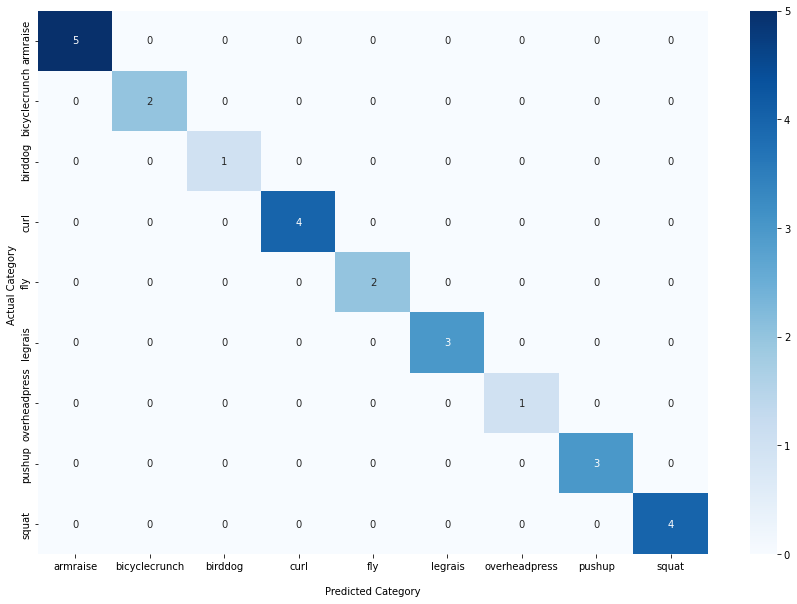